In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-genomics/cleaned_data_no_outliers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)

In [4]:
gdsc_data = pd.read_csv('/kaggle/input/cleaned-genomics/cleaned_data_no_outliers.csv')

In [5]:
gdsc_data.head().T

,0,1,2,3,4
COSMIC_ID,683667,687448,687452,687455,687457
CELL_LINE_NAME,PFSK-1,COLO-829,5637,RT4,SW780
TCGA_DESC,MB,SKCM,BLCA,BLCA,BLCA
DRUG_ID,1003,1003,1003,1003,1003
DRUG_NAME,Camptothecin,Camptothecin,Camptothecin,Camptothecin,Camptothecin
LN_IC50,-1.463887,-1.235034,-2.632632,-2.963191,-1.449138
AUC,0.93022,0.867348,0.834067,0.821438,0.90505
Z_SCORE,0.433123,0.557727,-0.203221,-0.3832,0.441154
GDSC Tissue descriptor 1,nervous_system,skin,Unknown,urogenital_system,urogenital_system
GDSC Tissue descriptor 2,medulloblastoma,melanoma,Unknown,Bladder,Bladder


In [6]:
gdsc_data.shape

(198342, 19)

In [7]:
gdsc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198342 entries, 0 to 198341
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                198342 non-null  int64  
 1   CELL_LINE_NAME                           198342 non-null  object 
 2   TCGA_DESC                                198342 non-null  object 
 3   DRUG_ID                                  198342 non-null  int64  
 4   DRUG_NAME                                198342 non-null  object 
 5   LN_IC50                                  198342 non-null  float64
 6   AUC                                      198342 non-null  float64
 7   Z_SCORE                                  198342 non-null  float64
 8   GDSC Tissue descriptor 1                 198342 non-null  object 
 9   GDSC Tissue descriptor 2                 198342 non-null  object 
 10  Cancer Type (matching TCGA label

In [8]:
gdsc_data_extra = gdsc_data.copy()

In [9]:
features_for_pca = ['CNA', 'Gene Expression', 'Methylation']

In [10]:
gdsc_data_extra['Drug_Potency_Index'] = -1 * gdsc_data_extra['LN_IC50'] + 3 * gdsc_data_extra['AUC'] - 0.5 * gdsc_data_extra['Z_SCORE']
gdsc_data_extra['Response_Variability'] = np.abs(gdsc_data_extra['Z_SCORE']) * np.log(1 + np.abs(gdsc_data_extra['LN_IC50']))

In [11]:
print("Dataset shape:", gdsc_data_extra.shape)
print("\nFirst few rows of the dataset:")
gdsc_data_extra.head().T

Dataset shape: (198342, 21)

First few rows of the dataset:


,0,1,2,3,4
COSMIC_ID,683667,687448,687452,687455,687457
CELL_LINE_NAME,PFSK-1,COLO-829,5637,RT4,SW780
TCGA_DESC,MB,SKCM,BLCA,BLCA,BLCA
DRUG_ID,1003,1003,1003,1003,1003
DRUG_NAME,Camptothecin,Camptothecin,Camptothecin,Camptothecin,Camptothecin
LN_IC50,-1.463887,-1.235034,-2.632632,-2.963191,-1.449138
AUC,0.93022,0.867348,0.834067,0.821438,0.90505
Z_SCORE,0.433123,0.557727,-0.203221,-0.3832,0.441154
GDSC Tissue descriptor 1,nervous_system,skin,Unknown,urogenital_system,urogenital_system
GDSC Tissue descriptor 2,medulloblastoma,melanoma,Unknown,Bladder,Bladder


In [12]:
print("\nDescriptive statistics:")
gdsc_data_extra.describe().T


Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
COSMIC_ID,198342.0,983267.229563,217226.212835,683667.000000,906792.000000,909704.000000,1.240128e+06,1.789883e+06
DRUG_ID,198342.0,1600.745707,394.220894,1003.000000,1168.000000,1632.000000,1.915000e+03,2.499000e+03
LN_IC50,198342.0,3.439308,1.939685,-3.278775,2.204931,3.557504,4.840144e+00,9.487697e+00
AUC,198342.0,0.924904,0.070389,0.696149,0.892726,0.954348,9.771220e-01,9.989040e-01
Z_SCORE,198342.0,0.112322,0.889919,-2.354747,-0.496447,0.117344,7.172285e-01,2.581014e+00
CNA,198342.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
Gene Expression,198342.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
Methylation,198342.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
Drug_Potency_Index,198342.0,-0.720758,2.045382,-7.775554,-2.166082,-0.730929,6.538729e-01,6.517272e+00
Response_Variability,198342.0,1.046814,0.924663,0.000002,0.355969,0.795735,1.472558e+00,5.976055e+00


In [13]:
features_for_pca = ['AUC', 'Z_SCORE', 'Drug_Potency_Index', 'Response_Variability']
X = gdsc_data_extra[features_for_pca].values

In [14]:
X_df = gdsc_data_extra[features_for_pca]
X_df.to_csv('X_df.csv', index=False)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled data - first few rows:")
print(X_scaled[:5])


Scaled data - first few rows:
[[ 0.07552666  0.36048399  2.32658545 -0.709719  ]
 [-0.8176824   0.50050151  2.0920218  -0.64700291]
 [-1.29049845 -0.35457579  2.91252056 -0.84860015]
 [-1.46991595 -0.5568182   3.09960664 -0.56142577]
 [-0.28205815  0.36950842  2.28049394 -0.7047516 ]]


In [16]:
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_pca)
X_scaled_df.to_csv('X_scaled_df.csv', index=False)

In [17]:
pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(X_scaled)
principal_df_2d = pd.DataFrame(
    data=principal_components_2d, 
    columns=['PC1', 'PC2']
)

In [18]:
print("\nExplained variance ratio (2D):", pca_2d.explained_variance_ratio_)
print("Cumulative explained variance (2D):", sum(pca_2d.explained_variance_ratio_))


Explained variance ratio (2D): [0.60590546 0.18272796]
Cumulative explained variance (2D): 0.7886334215495737


In [19]:
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(X_scaled)
principal_df_3d = pd.DataFrame(
    data=principal_components_3d,
    columns=['PC1', 'PC2', 'PC3']
)

In [20]:
print("\nExplained variance ratio (3D):", pca_3d.explained_variance_ratio_)
print("Cumulative explained variance (3D):", sum(pca_3d.explained_variance_ratio_))


Explained variance ratio (3D): [0.60590546 0.18272796 0.14121217]
Cumulative explained variance (3D): 0.9298455880840187


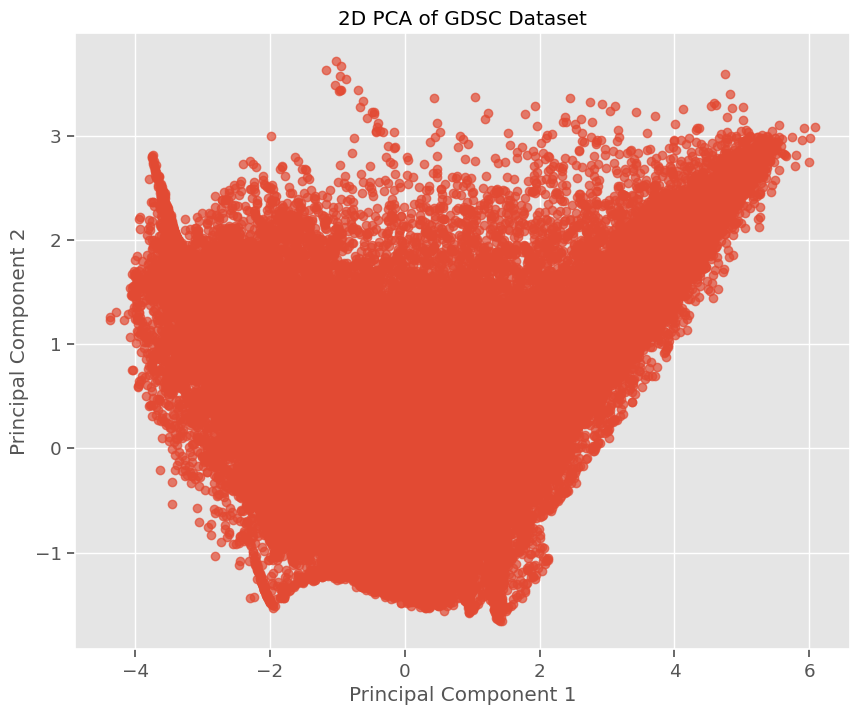

In [21]:
# Visualizing the 2D data
plt.figure(figsize=(10, 8))
plt.scatter(principal_df_2d['PC1'], principal_df_2d['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of GDSC Dataset')
plt.grid(True)
plt.savefig('gdsc_pca_2d.png')
plt.show()

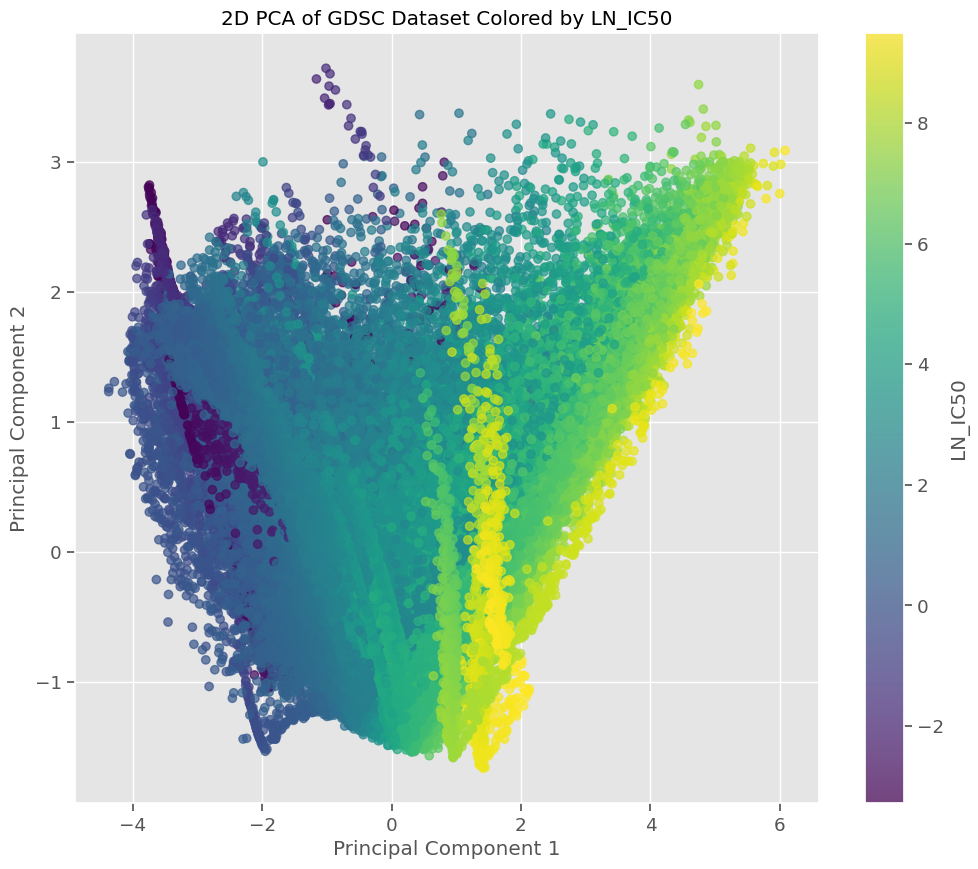

In [22]:
# Add color based on LN_IC50 values (target variable) to see pattern
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    principal_df_2d['PC1'], 
    principal_df_2d['PC2'], 
    c=gdsc_data_extra['LN_IC50'], 
    cmap='viridis', 
    alpha=0.7
)
plt.colorbar(scatter, label='LN_IC50')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of GDSC Dataset Colored by LN_IC50')
plt.grid(True)
plt.savefig('gdsc_pca_2d_colored.png')
plt.show()

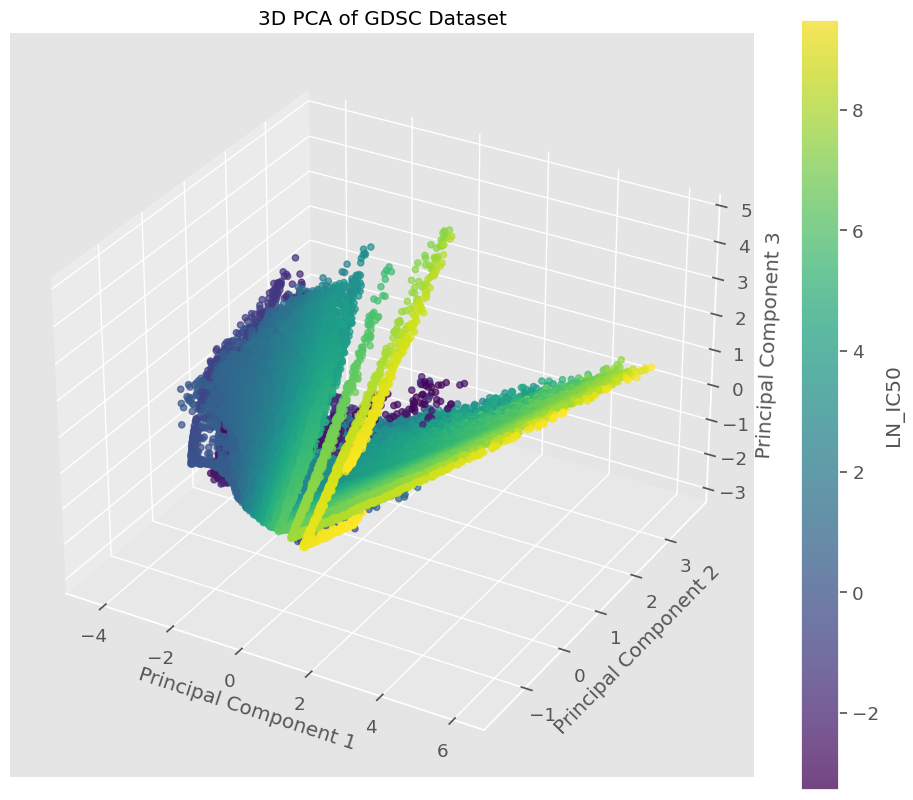

In [23]:
# Visualizing the 3D data
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    principal_df_3d['PC1'], 
    principal_df_3d['PC2'], 
    principal_df_3d['PC3'], 
    c=gdsc_data_extra['LN_IC50'],
    cmap='viridis', 
    alpha=0.7
)
fig.colorbar(scatter, ax=ax, label='LN_IC50')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of GDSC Dataset')
plt.savefig('gdsc_pca_3d.png')
plt.show()

In [24]:
# Find how many components needed for 95% variance
pca_full = PCA()
pca_full.fit(X_scaled)

PCA()

In [25]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

In [26]:
# Finding the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("\nNumber of components needed for 95% variance:", n_components_95)


Number of components needed for 95% variance: 4


In [27]:
# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=n_components_95, color='g', linestyle='--')
plt.text(n_components_95 + 0.1, 0.5, f'n_components = {n_components_95}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.savefig('gdsc_pca_95_variance.png')
plt.close()

In [28]:
# Extracting the top three eigenvalues
top_three_eigenvalues = pca_full.explained_variance_[:3]
print("\nTop three eigenvalues:", top_three_eigenvalues)


Top three eigenvalues: [2.42363406 0.73091553 0.56485151]


In [29]:
plt.figure(figsize=(12, 6))
loadings = pd.DataFrame(
    pca_2d.components_.T, 
    columns=['PC1', 'PC2'],
    index=features_for_pca
)

<Figure size 1200x600 with 0 Axes>

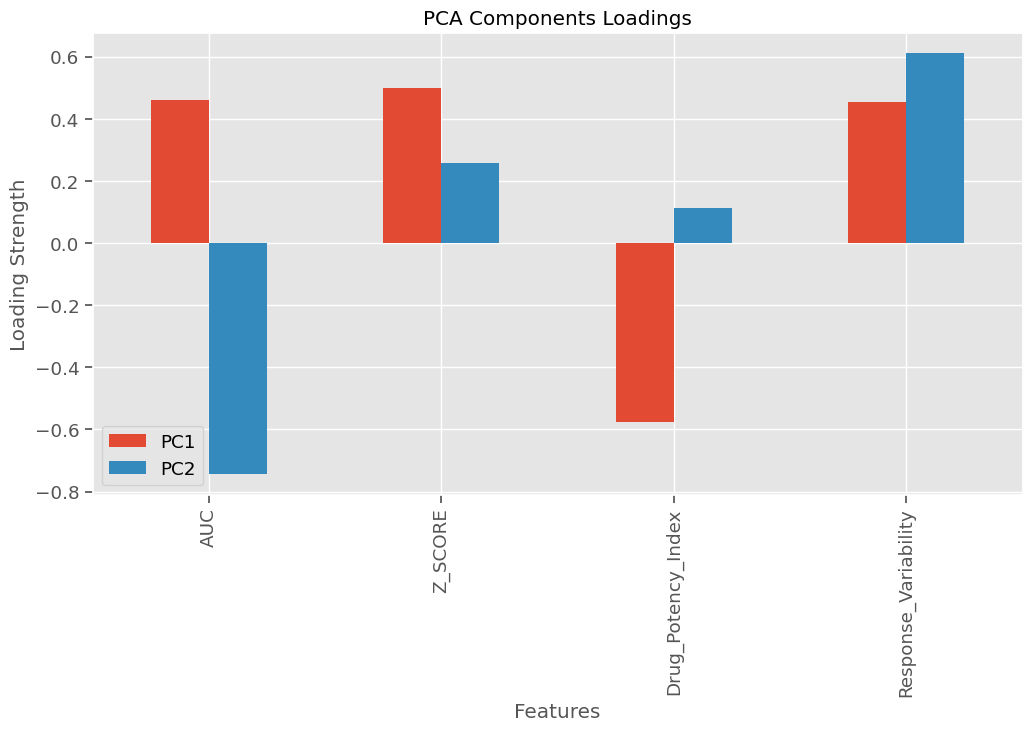

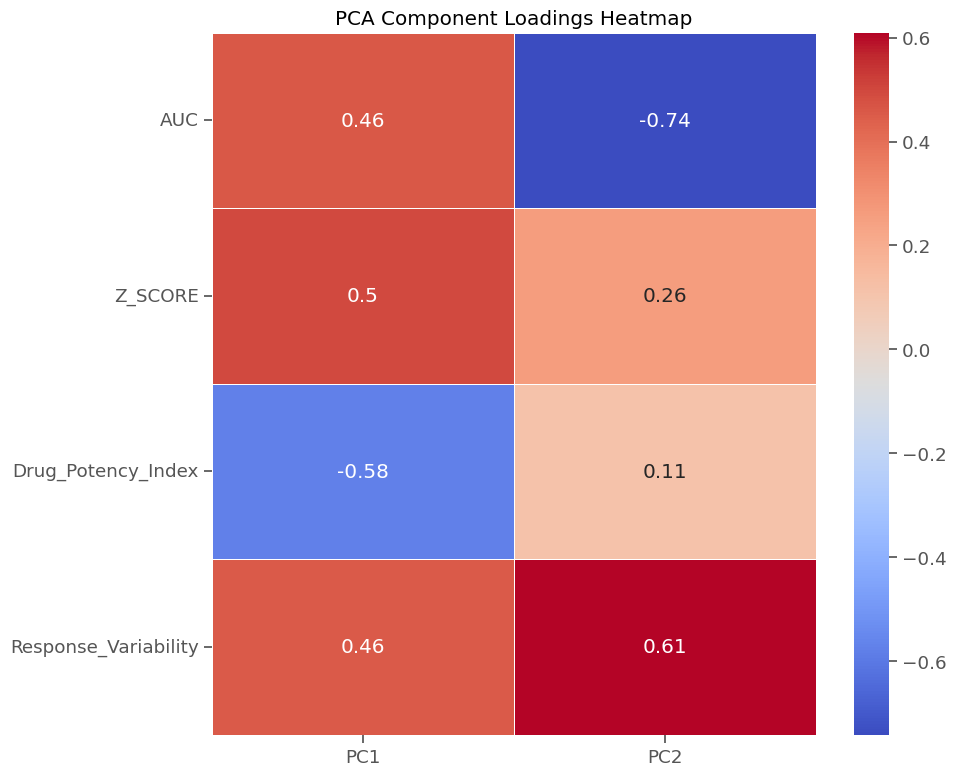

In [30]:
loadings.plot(kind='bar', figsize=(12, 6))
plt.title("PCA Components Loadings")
plt.xlabel("Features")
plt.ylabel("Loading Strength")
plt.grid(True)
plt.savefig('gdsc_pca_loadings.png')
plt.show()

# Create a heatmap of the loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("PCA Component Loadings Heatmap")
plt.tight_layout()
plt.savefig('gdsc_pca_loadings_heatmap.png')
plt.show()

In [31]:
gdsc_data_extra.head().T

,0,1,2,3,4
COSMIC_ID,683667,687448,687452,687455,687457
CELL_LINE_NAME,PFSK-1,COLO-829,5637,RT4,SW780
TCGA_DESC,MB,SKCM,BLCA,BLCA,BLCA
DRUG_ID,1003,1003,1003,1003,1003
DRUG_NAME,Camptothecin,Camptothecin,Camptothecin,Camptothecin,Camptothecin
LN_IC50,-1.463887,-1.235034,-2.632632,-2.963191,-1.449138
AUC,0.93022,0.867348,0.834067,0.821438,0.90505
Z_SCORE,0.433123,0.557727,-0.203221,-0.3832,0.441154
GDSC Tissue descriptor 1,nervous_system,skin,Unknown,urogenital_system,urogenital_system
GDSC Tissue descriptor 2,medulloblastoma,melanoma,Unknown,Bladder,Bladder


In [32]:
gdsc_data_extra.to_csv('/kaggle/working/gdsc_data_extra.csv', index=False)

In [33]:
numerical_features = gdsc_data_extra[features_for_pca]
numerical_features.head()

,AUC,Z_SCORE,Drug_Potency_Index,Response_Variability
0,0.930220,0.433123,4.037985,0.390564
1,0.867348,0.557727,3.558215,0.448556
2,0.834067,-0.203221,5.236444,0.262146
3,0.821438,-0.383200,5.619105,0.527685
4,0.905050,0.441154,3.943711,0.395158


In [34]:
principal_df_3d.head()

,PC1,PC2,PC3
0,-1.450609,-0.136534,-0.570689
1,-1.627529,0.573816,-0.877641
2,-2.836404,0.674095,-0.448093
3,-2.996950,0.951352,-0.157904
4,-1.581640,0.128855,-0.668696


In [35]:
principal_df_3d.to_csv('principal_df_3d.csv', index=False)